You've been given a file helpfully named `fakeData.txt`. Your mission, should you choose to accept it, is to:

- Read in that file
- Seperate it into two sets using the "bad" column (-1 means bad)
- Plot the good data
- Plot the bad data using "X"s to clearly denote it
- Fit a line to the data using an appropriate polynomial function

You should accept the mission, it is a completion grade. The purpose of this assignment is to see how much you remember from your intro to programming class, and to see if you developed and very good or very bad habits. Please do your best to demonstrate good habits! (e.g., descriptive variable names, readable code, maybe even proper PEP 8 coding style!)

You may use any resources at your disposal, except your friends please. I want to see what **YOU** remember. But your textbook, the internet, any lecture notes or homework you have from your previous all, are all free game as reference for this assignment. Just try to avoid copy-pasting too much (I'll be able to tell).

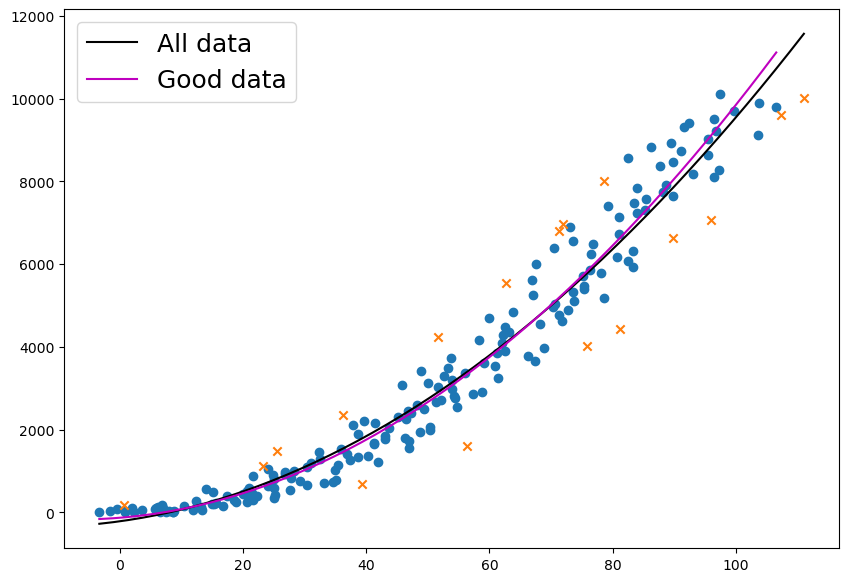

In [1]:
# Let's begin by setting expectations low, ok?

import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits 
import scipy.optimize as opt

# We will use an even polynomial fit; this is simplest
def poly2fit(x,a,b,c):
    return a*x**2 + b*x + c
    
# This is Frinchaboy's fit code for a three parameter curve using Monte Carlo; I don't know any other way at the moment.
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))


# Empty lists for sorting soon
goodx = ()
goody = ()
badx = ()
bady = () #That's me

# So a simple np.loadtxt with unpack doesn't work as due to reading in the column names. Let's try genfromtxt.
# After looking at numpy documentation and StackOverflow to figure out how to use this function, I figured it out:
# Since dtype = None, numpy wants me to declare encoding = None. Delimiter and dtype gets the individual indexes to be floats and not strings.
x,y,mixed = np.genfromtxt("fakeData.txt", dtype = None, delimiter = ",", skip_header = True, unpack = True,encoding = None)

# Seperating good and bad
for i in range(0,len(mixed)):
    if mixed[i] == -1:
        badx = np.append(badx,x[i])
        bady = np.append(bady,y[i])
    else:
        goodx = np.append(goodx,x[i])
        goody = np.append(goody,y[i])


# Graphing with help of previous class since I forgot how to create a graph (sorry!)
fig1 = plt.figure(figsize = (10,7))
graph = fig1.add_subplot(111)
graph.scatter(goodx,goody)
graph.scatter(badx,bady, marker = "x")

# Now we need to fit a function to this. I don't know what's better to do: fit to all data or to all good data. I presume the latter, but can do both.


polyA,polyB,polyC = mcFit3(poly2fit, x,y)
lowestx = np.min(x)
highestx = np.max(x)
xfitpoints = np.linspace(lowestx,highestx)

polyGoodA,polyGoodB,polyGoodC = mcFit3(poly2fit,goodx,goody)
lowestGoodx = np.min(goodx)
highestGoodx = np.max(goodx)
goodxfitpoints= np.linspace(lowestGoodx,highestGoodx)


graph.plot(xfitpoints, poly2fit(xfitpoints, polyA, polyB,polyC), c = "k", label = "All data")
graph.plot(goodxfitpoints, poly2fit(goodxfitpoints, polyGoodA,polyGoodB,polyGoodC), c = "m", label = "Good data")

plt.legend(loc='best', fontsize=18)
plt.show()